<a href="https://colab.research.google.com/github/shruti0219/authenticity_detection/blob/main/authenticity_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
df = pd.read_csv('fake_or_real_news.csv')

In [24]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [25]:
df.shape

(6335, 4)

In [26]:
df['label_num'] = df['label'].map(lambda x: 1 if x == "REAL" else 0)

In [27]:
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [28]:
df.duplicated(subset={"title"}).value_counts()

False    6256
True       79
dtype: int64

In [29]:
# Deleting the duplicates
df1 =  df.drop_duplicates(subset={"title"},keep="first")
df1.duplicated(subset={"title"}).value_counts()

False    6256
dtype: int64

In [30]:
import re
# cleaning html symbols from the sentence
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [31]:
# cleaning punctuations from the sentence
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english') #All the stopwords in English language
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer

In [34]:
i = 0
string1 = ' '
final_string = []
fake_words = []                
real_words = []
s = ''

for sent in df1['text'].values:
    filtered_sentence = []
    sent = cleanhtml(sent)
    sent = cleanpunc(sent)
    for w in sent.split():
        if((w.isalpha()) and (len(w)>2)):  
            if(w.lower() not in stop):    # If it is a stopword
                s = (snow.stem(w.lower())).encode('utf8')
                filtered_sentence.append(s)
                if (df1['label'].values)[i] == 'REAL':
                    real_words.append(s)
                if(df1['label'].values)[i] == 'FAKE':
                    fake_words.append(s)
            else:
                continue
        else:
            continue 
    string1 = b" ".join(filtered_sentence) 
    final_string.append(string1)
    i += 1

In [35]:
from collections import Counter
print("Number of Real words: ", len(real_words))
print("Number of Fake words: ", len(fake_words))

Number of Real words:  1467750
Number of Fake words:  1082029


In [36]:
df1['CleanedText'] = final_string
df1.head()

<ipython-input-36-faf7d92b387c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CleanedText'] = final_string


,Unnamed: 0,title,text,label,label_num,CleanedText
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,b'daniel greenfield shillman journal fellow fr...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,b'googl pinterest digg linkedin reddit stumble...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,b'secretari state john kerri said monday stop ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,b'kayde king novemb lesson tonight dem time de...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,b'primari day new york hillari clinton donald ...


In [37]:
# without stem
i = 0
string1 = ' '
final_string_nostem = []
s = ''

for sent in df1['text'].values:
    filtered_sentence=[]
    sent = cleanhtml(sent)
    sent = cleanpunc(sent)
    for w in sent.split():
        if((w.isalpha()) and (len(w)>2)):  
            if(w.lower() not in stop):
                s = w.lower().encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
        else:
            continue 
    string1 = b" ".join(filtered_sentence)     
    final_string_nostem.append(string1)
    i += 1

In [38]:
df1['CleanedText_NoStem'] = final_string_nostem

<ipython-input-38-2a1ad90ab1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CleanedText_NoStem'] = final_string_nostem


In [39]:
df1.head(3)

,Unnamed: 0,title,text,label,label_num,CleanedText,CleanedText_NoStem
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,b'daniel greenfield shillman journal fellow fr...,b'daniel greenfield shillman journalism fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,b'googl pinterest digg linkedin reddit stumble...,b'google pinterest digg linkedin reddit stumbl...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,b'secretari state john kerri said monday stop ...,b'secretary state john kerry said monday stop ...


In [40]:
from sklearn.base import TransformerMixin, BaseEstimator
from gensim.models import Word2Vec
class w2v(TransformerMixin, BaseEstimator):
  def __init__(self, size=100, alpha=0.025, window=5, min_count=10, max_vocab_size=None, sample=1e-3, seed=1, workers=3, min_alpha=0.0001, sg=1, hs=0, negative=5, cbow_mean=1, iter=10, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000):
        """
        Sklearn wrapper for Word2Vec model. See gensim.models.Word2Vec for parameter details.
        """
        self.model = None
        self.size = size
        self.alpha = alpha
        self.window = window
        self.min_count = min_count
        self.max_vocab_size = max_vocab_size
        self.sample = sample
        self.seed = seed
        self.workers = workers
        self.min_alpha = min_alpha
        self.sg = sg
        self.hs = hs
        self.negative = negative
        self.cbow_mean = int(cbow_mean)
        self.iter = iter
        self.null_word = null_word
        self.trim_rule = trim_rule
        self.sorted_vocab = sorted_vocab
        self.batch_words = batch_words

  def fit(self, X, y=None):
        """
        Fit the model according to the given training data.
        Calls gensim.models.Word2Vec
        """
        X_tokenized = X.apply(lambda sent: sent.split())
        
        self.model = Word2Vec(
            sentences=X_tokenized, size=self.size, alpha=self.alpha,
            window=self.window, min_count=self.min_count, max_vocab_size=self.max_vocab_size,
            sample=self.sample, seed=self.seed, workers=self.workers, min_alpha=self.min_alpha,
            sg=self.sg, hs=self.hs, negative=self.negative, cbow_mean=self.cbow_mean, 
            iter=self.iter, null_word=self.null_word, trim_rule=self.trim_rule,
            sorted_vocab=self.sorted_vocab, batch_words=self.batch_words
        )
        return self

  def transform(self, X):
        return X.apply(self.avg_word_vector)

  def avg_word_vector(self, sent):
        """
        Returns an average word vector 
        from list of words
        if words are not in the wordvector
        vocabulary or in wordlist is 
        empty then returns a zero vector
        """
        word_list = sent.split()
        sent_vec = np.zeros(self.size)
        word_cnt = 0
        for word in word_list:
            try:
                vec = self.model.wv[word]
                sent_vec += vec
                word_cnt += 1
            except KeyError:
                pass
        if word_cnt != 0:
            sent_vec /= word_cnt
        return pd.Series(sent_vec)

  def most_similar(self, word):
        return self.model.wv.most_similar(word)

  def vocabulary(self):
        """
        Returns a Dataframe with 
        word as index and rows as vectors
        """
        # build a list of the terms, integer indices,
        # and term counts from the word2vec model vocabulary
        ordered_vocab = [(term, voc.index, voc.count)
                         for term, voc in self.model.wv.vocab.items()]

        # sort by the term counts, so the most common terms appear first
        ordered_vocab = sorted(ordered_vocab, key=lambda k : k[2], reverse=True)

        # unzip the terms, integer indices, and counts into separate lists
        ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

        # create a DataFrame with the word vectors as data,
        # and the terms as row labels
        wordvectors = pd.DataFrame(self.model.wv.vectors_norm[term_indices, :],
                                    index=ordered_terms)

        return wordvectors

In [41]:
import numpy as np
w2v_model = w2v()

w2v_features = w2v_model.fit_transform(df1['text'])
w2v_features.shape

(6256, 100)

In [42]:
from sklearn import preprocessing
avg_w2v_norm = preprocessing.normalize(w2v_features)

In [43]:
avg_w2v_norm

array([[-0.13182776,  0.0247321 , -0.10604377, ...,  0.0038132 ,
         0.12324559,  0.0726212 ],
       [-0.09309963,  0.02313064, -0.07194445, ...,  0.01510993,
         0.09035074,  0.01642763],
       [-0.07129213,  0.02314937, -0.04624414, ...,  0.00559284,
         0.09092216,  0.01458398],
       ...,
       [-0.08881075, -0.00866738, -0.07743407, ...,  0.00398763,
         0.0727876 ,  0.03348181],
       [-0.05608065,  0.01229174, -0.08069158, ..., -0.00372243,
         0.09582071,  0.04362877],
       [-0.10307066,  0.00445424, -0.13902068, ...,  0.03258761,
         0.09936991,  0.05140595]])

In [47]:
# spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(avg_w2v_norm,df1['label'], test_size=0.3, shuffle=False)

In [45]:
from sklearn import metrics
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [50]:
pred_lr=LR.predict(X_test)

In [52]:
LR.score(X_test, y_test)

0.8987746403835908

In [53]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       946
        REAL       0.89      0.90      0.90       931

    accuracy                           0.90      1877
   macro avg       0.90      0.90      0.90      1877
weighted avg       0.90      0.90      0.90      1877



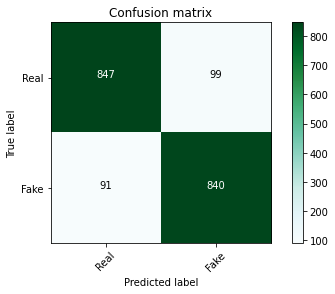

In [54]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [55]:
plt.savefig('Logistic_Regression.jpg')

<Figure size 432x288 with 0 Axes>

In [58]:
from sklearn import svm
svm_ = svm.SVC(kernel="linear")
svm_.fit(X_train, y_train)
pred_svm = svm_.predict(X_test)
print(svm_.score(X_test, y_test))

0.9163558870538092


In [59]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

        FAKE       0.92      0.91      0.92       946
        REAL       0.91      0.92      0.92       931

    accuracy                           0.92      1877
   macro avg       0.92      0.92      0.92      1877
weighted avg       0.92      0.92      0.92      1877



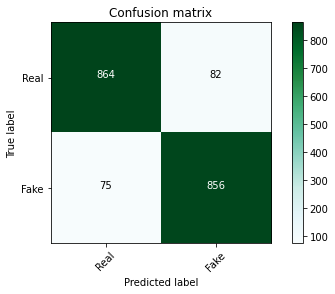

In [60]:
cm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [61]:
plt.savefig('SVM.jpg')

<Figure size 432x288 with 0 Axes>

In [63]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt = DT.predict(X_test)
DT.score(X_test, y_test)

0.8092701118806607

In [67]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

        FAKE       0.83      0.78      0.80       946
        REAL       0.79      0.84      0.81       931

    accuracy                           0.81      1877
   macro avg       0.81      0.81      0.81      1877
weighted avg       0.81      0.81      0.81      1877



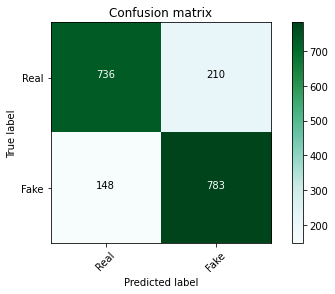

In [66]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [68]:
plt.savefig('Decision_Tree.jpg')

<Figure size 432x288 with 0 Axes>


The optimal number of neighbors is 5.


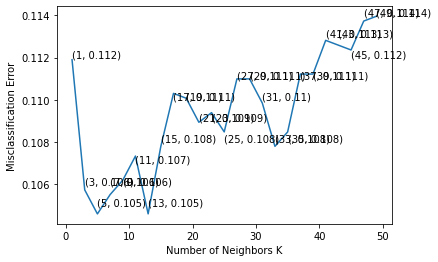

the misclassification error for each k value is :  [0.112 0.106 0.105 0.106 0.106 0.107 0.105 0.108 0.11  0.11  0.109 0.109
 0.108 0.111 0.111 0.11  0.108 0.108 0.111 0.111 0.113 0.113 0.112 0.114
 0.114]


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#creating odd list of K for KNN

myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.8977091102823654


In [76]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

        FAKE       0.94      0.85      0.89       946
        REAL       0.86      0.95      0.90       931

    accuracy                           0.90      1877
   macro avg       0.90      0.90      0.90      1877
weighted avg       0.90      0.90      0.90      1877



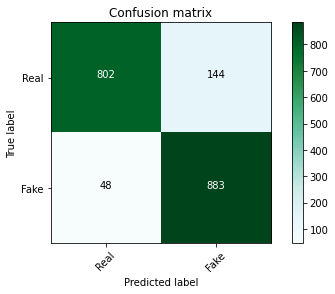

In [77]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [78]:
plt.savefig('KNN.jpg')

<Figure size 432x288 with 0 Axes>

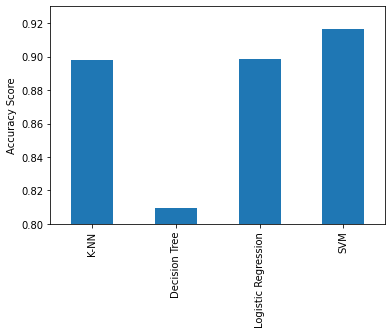

In [84]:
model_accuracy = {
    'K-NN': 0.8977091102823654,
    'Decision Tree': 0.8092701118806607,
    'Logistic Regression': 0.8987746403835908,
    'SVM': 0.9163558870538092
}

pd.Series(model_accuracy).plot(kind='bar')
plt.ylabel('Accuracy Score')
plt.ylim((0.80, 0.93));